In [1]:
#Importing the required libraries
from silo_to_yt import make_snapshots #, #get_ds, get_ts
import yt
import numpy as np
import os
from make_movies import make_movies
import h5py
from pypion.ReadData import ReadData
import pickle
yt.set_log_level("ERROR")

cwd = os.getcwd()

In [2]:
data_path = "/mnt/massive-stars/data/thomas_simulations/wr140-sims/covertex_start/orig_res/wr140-hydro-cool-n064/"
# data_path = "/mnt/massive-stars/data/thomas_simulations/wr140-sims/covertex_start/orig_res/wr140-hydro-cool-n128/"

# Get the list of silo files
evolution = make_snapshots(data_path)

files = evolution[0:10]

WR140_hydro_cool_d3l6n064
Simulation Info: 6 levels
Shape of evolution array: (423, 6)


In [3]:
files

array([['WR140_hydro_cool_d3l6n064_level00_0000.00000000.silo',
        'WR140_hydro_cool_d3l6n064_level01_0000.00000000.silo',
        'WR140_hydro_cool_d3l6n064_level02_0000.00000000.silo',
        'WR140_hydro_cool_d3l6n064_level03_0000.00000000.silo',
        'WR140_hydro_cool_d3l6n064_level04_0000.00000000.silo',
        'WR140_hydro_cool_d3l6n064_level05_0000.00000000.silo'],
       ['WR140_hydro_cool_d3l6n064_level00_0000.00001024.silo',
        'WR140_hydro_cool_d3l6n064_level01_0000.00001024.silo',
        'WR140_hydro_cool_d3l6n064_level02_0000.00001024.silo',
        'WR140_hydro_cool_d3l6n064_level03_0000.00001024.silo',
        'WR140_hydro_cool_d3l6n064_level04_0000.00001024.silo',
        'WR140_hydro_cool_d3l6n064_level05_0000.00001024.silo'],
       ['WR140_hydro_cool_d3l6n064_level00_0000.00002048.silo',
        'WR140_hydro_cool_d3l6n064_level01_0000.00002048.silo',
        'WR140_hydro_cool_d3l6n064_level02_0000.00002048.silo',
        'WR140_hydro_cool_d3l6n064_lev

In [12]:


def get_grid_data(file):
    data = ReadData(file)
    sim_time = data.sim_time()
    N_levels = data.nlevels()
    N_grids = data.ngrid()
    Dom_size = max(data.level_max()) - max(data.level_min())

    data_den = data.get_3Darray("Density")['data']
    data_temp = data.get_3Darray("Temperature")['data']
    data_velx = data.get_3Darray("VelocityX")['data']
    data_vely = data.get_3Darray("VelocityY")['data']
    data_velz = data.get_3Darray("VelocityZ")['data']
    # data_ngmask = data.get_3Darray("NG_Mask")['data']

    grid_data = [dict(left_edge=[0.5-0.5**(n+1)]*len(N_grids), right_edge=[0.5+0.5**(n+1)]*len(N_grids), level=n, dimensions=N_grids) for n in range(N_levels)]

    i = 0
    for g in grid_data:
        g[("gas", "density")] = (data_den[i], "g/cm**3")
        g[("gas", "temperature")] = (data_temp[i], "K")
        g[("gas", "velocity_x")] = (data_velx[i], "cm/s")
        g[("gas", "velocity_y")] = (data_vely[i], "cm/s")
        g[("gas", "velocity_z")] = (data_velz[i], "cm/s")
        # g[("gas", "NG_Mask")] = (data_ngmask[i], "cm/s")
    i += 1

    return {'grid_data': grid_data, 'sim_time': sim_time, 'N_grids': N_grids, 'Dom_Size': Dom_size}
    

In [4]:
import pickle

def save_grid_data_to_pickle(files, pickle_file):

    grid_data_array = []
    sim_time_array = []
    N_grids_array = []
    Dom_size_array = []

    for file in files:
        data = ReadData(file)

        sim_time = data.sim_time()
        N_levels = data.nlevels()
        N_grids = data.ngrid()
        Dom_size = max(data.level_max()) - max(data.level_min())

        data_den = data.get_3Darray("Density")['data']
        data_temp = data.get_3Darray("Temperature")['data']
        data_velx = data.get_3Darray("VelocityX")['data']
        data_vely = data.get_3Darray("VelocityY")['data']
        data_velz = data.get_3Darray("VelocityZ")['data']
        # data_ngmask = data.get_3Darray("NG_Mask")['data']

        grid_data = [dict(left_edge=[0.5-0.5**(n+1)]*len(N_grids), right_edge=[0.5+0.5**(n+1)]*len(N_grids), level=n, dimensions=N_grids) for n in range(N_levels)]

        i = 0
        for g in grid_data:
            g[("gas", "density")] = (data_den[i], "g/cm**3")
            g[("gas", "temperature")] = (data_temp[i], "K")
            g[("gas", "velocity_x")] = (data_velx[i], "cm/s")
            g[("gas", "velocity_y")] = (data_vely[i], "cm/s")
            g[("gas", "velocity_z")] = (data_velz[i], "cm/s")
            # g[("gas", "NG_Mask")] = (data_ngmask[i], "cm/s")
        i += 1

        grid_data_array.append(grid_data)
        sim_time_array.append(sim_time)
        N_grids_array.append(N_grids)
        Dom_size_array.append(Dom_size)

    # grid_dict = {'grid_data': grid_data_array, 'sim_time': sim_time_array, 'N_grids': N_grids_array[0], 'Dom_Size': Dom_size_array[0]}

    return grid_data_array, sim_time_array, N_grids_array[0], Dom_size_array[0] 
    # os.chdir(cwd)
    
    # with open(pickle_file, 'wb') as f:
    #     pickle.dump(grid_dict, f)

In [20]:
grid_data, sim_time, N_grids, Dom_size = save_grid_data_to_pickle(files, "wr1402.pickle")

In [21]:
# grid_data[0][0]['gas', 'density']

In [22]:
# grid_data = grid_dict['grid_data'][0]
# N_grids = grid_dict['N_grids']
# Dom_size = grid_dict['Dom_Size']
# sim_time = grid_dict['sim_time'][0]

In [24]:
ds = yt.load_amr_grids(grid_data, N_grids, length_unit=f"{Dom_size} * cm", geometry=("cartesian", ("z","y","x")), sim_time=sim_time[0])


TypeError: list indices must be integers or slices, not tuple


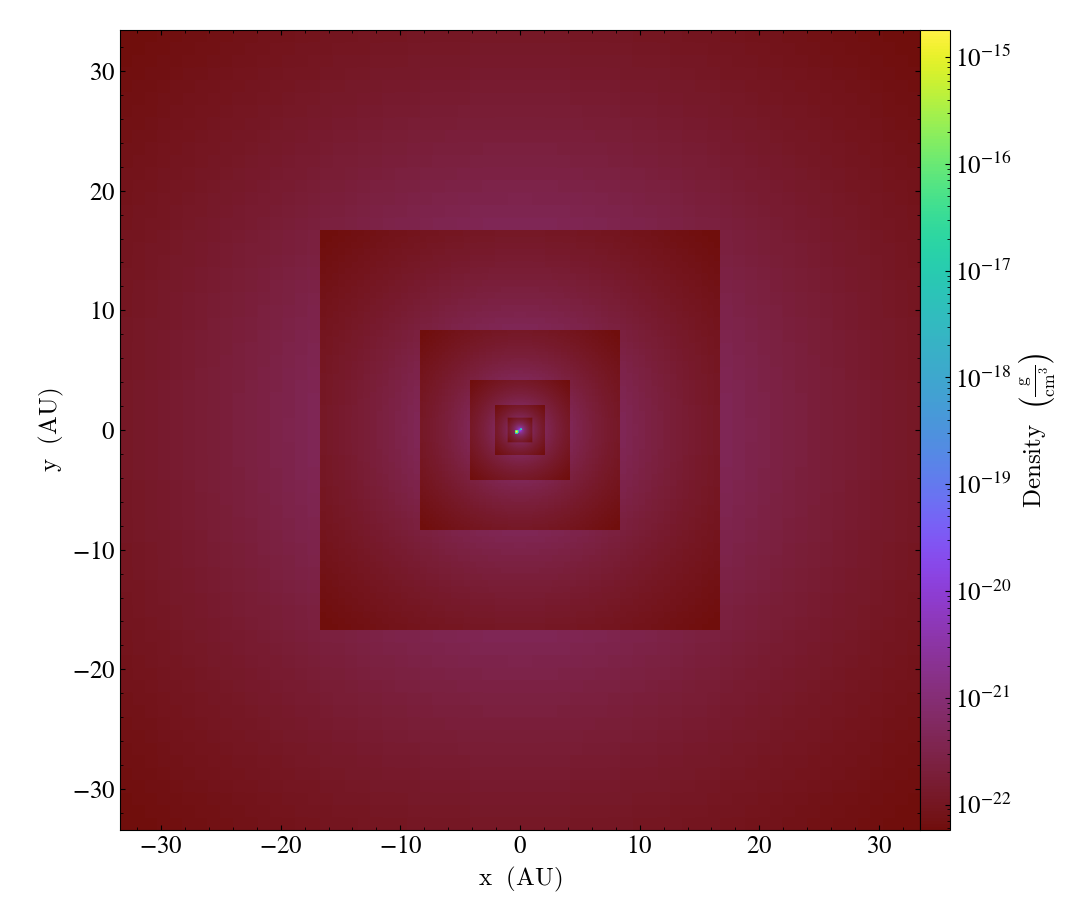

In [9]:
slc = yt.SlicePlot(ds, "z", "density")
slc.show()

In [11]:
# with open ('wr1402.pickle', 'rb') as f:
#     grid_dict = pickle.load(f) 



In [134]:
grid_data_array = []
sim_time_array = []
N_grids_array = []
Dom_size_array = []

for file in files:
    _ = get_grid_data(file)
    
    grid_data_array.append(_['grid_data'])
    sim_time_array.append(_['sim_time'])
    N_grids_array.append(_['N_grids'])
    Dom_size_array.append(_['Dom_Size'])

grid_dict = {'grid_data': grid_data_array, 'sim_time': sim_time_array, 'N_grids': N_grids_array[0], 'Dom_Size': Dom_size_array[0]}

In [137]:

os.chdir(cwd)
with open('wr140.pickle', 'wb') as f:
    pickle.dump(grid_dict, f)

In [140]:
# with open ('wr140.pickle', 'rb') as f:
#     grid_dict = pickle.load(f) 

# grid_dict['grid_data'][0]

[{'left_edge': [0.0, 0.0, 0.0],
  'right_edge': [1.0, 1.0, 1.0],
  'level': 0,
  'dimensions': [128, 128, 128],
  ('gas',
   'density'): (array([[[3.79030400e-23, 3.83017760e-23, 3.87024593e-23, ...,
            3.87024593e-23, 3.83017760e-23, 3.79030400e-23],
           [3.83017760e-23, 3.87089906e-23, 3.91182846e-23, ...,
            3.91182846e-23, 3.87089906e-23, 3.83017760e-23],
           [3.87024593e-23, 3.91182846e-23, 3.95363265e-23, ...,
            3.95363265e-23, 3.91182846e-23, 3.87024593e-23],
           ...,
           [3.87024593e-23, 3.91182846e-23, 3.95363265e-23, ...,
            3.95363265e-23, 3.91182846e-23, 3.87024593e-23],
           [3.83017760e-23, 3.87089906e-23, 3.91182846e-23, ...,
            3.91182846e-23, 3.87089906e-23, 3.83017760e-23],
           [3.79030400e-23, 3.83017760e-23, 3.87024593e-23, ...,
            3.87024593e-23, 3.83017760e-23, 3.79030400e-23]],
   
          [[3.83017760e-23, 3.87089906e-23, 3.91182846e-23, ...,
            3.91182846e

In [112]:
# files = evolution[0:2]

# grid_data_array =[]
# sim_time_array =[]

# from pypion.ReadData import ReadData

# for file in files:
#     data = ReadData(file)
#     sim_time = data.sim_time()
#     N_levels = data.nlevels()
#     N_grids = data.ngrid()
#     Dom_size = max(data.level_max()) - max(data.level_min())

#     data_den = data.get_3Darray("Density")['data']
#     data_temp = data.get_3Darray("Temperature")['data']
#     data_velx = data.get_3Darray("VelocityX")['data']
#     data_vely = data.get_3Darray("VelocityY")['data']
#     data_velz = data.get_3Darray("VelocityZ")['data']
#     # data_ngmask = data.get_3Darray("NG_Mask")['data']

#     grid_data = [dict(left_edge=[0.5-0.5**(n+1)]*len(N_grids), right_edge=[0.5+0.5**(n+1)]*len(N_grids), level=n, dimensions=N_grids) for n in range(N_levels)]

#     i = 0
#     for g in grid_data:
#         g[("gas", "density")] = (data_den[i], "g/cm**3")
#         g[("gas", "temperature")] = (data_temp[i], "K")
#         g[("gas", "velocity_x")] = (data_velx[i], "cm/s")
#         g[("gas", "velocity_y")] = (data_vely[i], "cm/s")
#         g[("gas", "velocity_z")] = (data_velz[i], "cm/s")
#         # g[("gas", "NG_Mask")] = (data_ngmask[i], "cm/s")
#         i += 1

#     grid_data_array.append(grid_data)
#     sim_time_array.append(sim_time)

In [114]:
grid_dict = {'grid_data': grid_data_array, 'sim_time': sim_time_array, 'Dom_Size': Dom_size, 'N_grids': N_grids, 'N_levels': N_levels}

In [115]:
import pickle
os.chdir(cwd)
with open('wr140.pickle', 'wb') as f:
    pickle.dump(grid_dict, f)

In [120]:
with open ('wr140.pickle', 'rb') as f:
    grid_dict = pickle.load(f) 

In [122]:
grid_data = grid_dict['grid_data'][0]
N_grids = grid_dict['N_grids']
Dom_Size = grid_dict['Dom_Size']
sim_time = grid_dict['sim_time'][0]



In [123]:
ds = yt.load_amr_grids(grid_data, N_grids, length_unit=f"{Dom_size} * cm", geometry=("cartesian", ("z","y","x")), sim_time=sim_time)

In [14]:
os.chdir(cwd)

In [21]:
os.chdir(cwd)

type(grid_data[0])

dict

In [23]:
import pickle

with open('data.pickle', 'wb') as f:
    pickle.dump(grid_data, f)

In [31]:
with open ('data.pickle', 'rb') as f:
    grid_data = pickle.load(f) 

In [34]:
dictionary = {'sim_time': sim_time, 'grid_data': grid_data }


In [37]:
dictionary['sim_time']

<Quantity 0. s>

In [38]:
ds = yt.load_amr_grids(grid_data, N_grids, length_unit=f"{Dom_size} * cm", geometry=("cartesian", ("z","y","x")), sim_time=sim_time)

ImportError: cannot import name 'get_ts' from 'silo_to_yt' (/net/maedoc.ap.dias.ie/maedoc/home_cr/visitor_ap4/code/project/scripts/yt_folder/silo_to_yt.py)

In [3]:
ts = get_ts(files)

TypeError: Can't convert element 0 (AMRGridData) to hsize_t

In [5]:
def get_ds(file) -> yt.data_objects.static_output.Dataset:
    data = ReadData(file)
    sim_time = data.sim_time()
    N_levels = data.nlevels()
    N_grids = data.ngrid()
    Dom_size = max(data.level_max()) - max(data.level_min())

    data_den = data.get_3Darray("Density")['data']
    data_temp = data.get_3Darray("Temperature")['data']
    data_velx = data.get_3Darray("VelocityX")['data']
    data_vely = data.get_3Darray("VelocityY")['data']
    data_velz = data.get_3Darray("VelocityZ")['data']
    # data_ngmask = data.get_3Darray("NG_Mask")['data']

    grid_data = [dict(left_edge=[0.5-0.5**(n+1)]*len(N_grids), right_edge=[0.5+0.5**(n+1)]*len(N_grids), level=n, dimensions=N_grids) for n in range(N_levels)]

    i = 0
    for g in grid_data:
        g[("gas", "density")] = (data_den[i], "g/cm**3")
        g[("gas", "temperature")] = (data_temp[i], "K")
        g[("gas", "velocity_x")] = (data_velx[i], "cm/s")
        g[("gas", "velocity_y")] = (data_vely[i], "cm/s")
        g[("gas", "velocity_z")] = (data_velz[i], "cm/s")
        # g[("gas", "NG_Mask")] = (data_ngmask[i], "cm/s")
        i += 1


    return {"grid_data": grid_data, "sim_time": sim_time, "Dom_Size": Dom_size, "N_grids": N_grids, "N_levels": N_levels}

In [18]:
file

array(['WR140_hydro_cool_d3l6n064_level00_0000.00000000.silo',
       'WR140_hydro_cool_d3l6n064_level01_0000.00000000.silo',
       'WR140_hydro_cool_d3l6n064_level02_0000.00000000.silo',
       'WR140_hydro_cool_d3l6n064_level03_0000.00000000.silo',
       'WR140_hydro_cool_d3l6n064_level04_0000.00000000.silo',
       'WR140_hydro_cool_d3l6n064_level05_0000.00000000.silo'],
      dtype='<U52')

In [20]:
# with h5py.File("wr140_ts.h5", "w") as f:

#     i = 1
#     for file in files:
#         dict = get_ds(file)
#         f.create_dataset(f"dict_{i}", data=dict)
#         i+=1
#         # for key in ds.keys():
#         #     f.create_dataset(key, data=ds[key])

In [30]:
os.chdir(cwd)
cwd

'/net/aramis.ap.dias.ie/aramis/massive-stars/data/thomas_simulations/wr140-sims/covertex_start/orig_res/wr140-hydro-cool-n064'

In [31]:
os.chdir("/home/visitor_ap4/code/project/scripts/yt_folder")

In [6]:
data_array = []

for file in files:
    file_dict = get_ds(file)
    data_array.append(file_dict)

In [7]:
data_dict = data_array[0]

grid_data = data_dict['grid_data']
sim_time = data_dict['sim_time']
Dom_Size = data_dict['Dom_Size']
N_grids = data_dict['N_grids']

In [8]:
ds = yt.load_amr_grids(grid_data, N_grids, length_unit=f"{Dom_Size} * cm", geometry=("cartesian", ("z","y","x")), sim_time=sim_time)


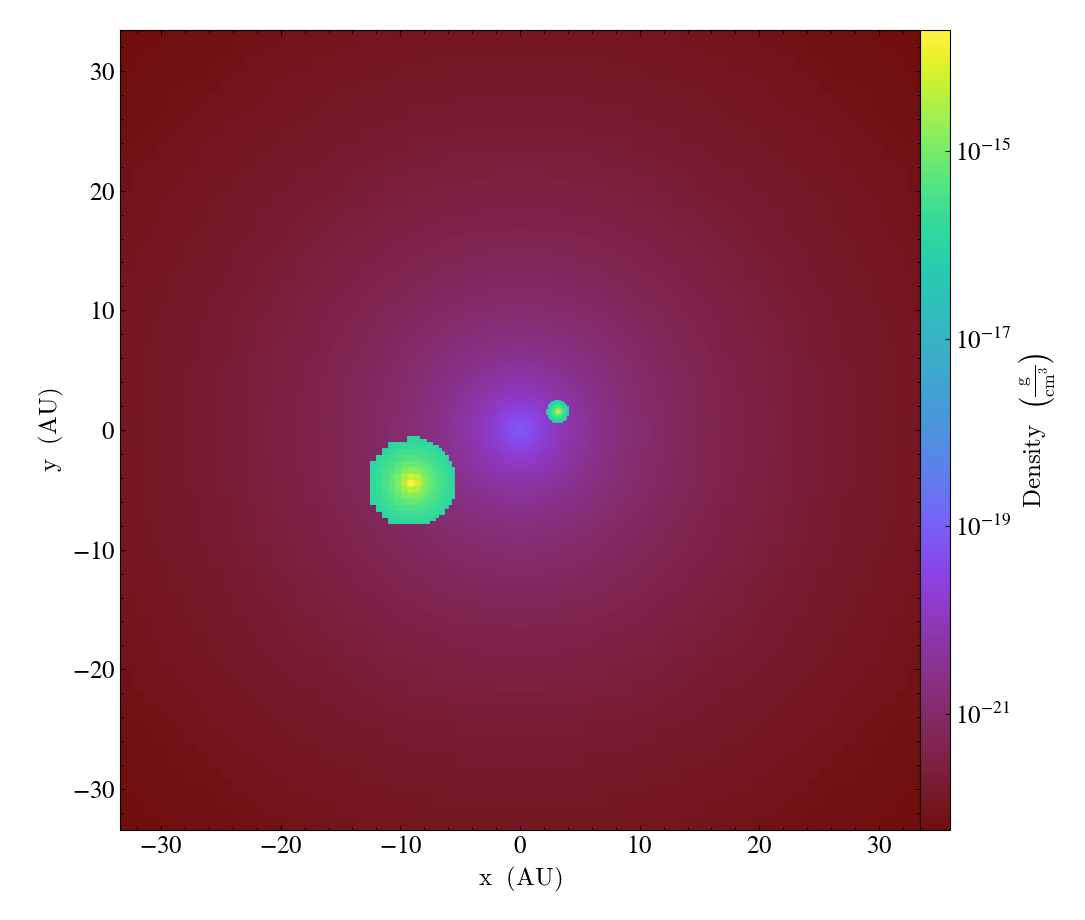

In [9]:
slc = yt.SlicePlot(ds, "z", "density")
slc.show()

In [36]:
with open("newpicklefile2.pickle", 'xb') as f:
    for file in files:
        data = get_ds(file)
        pickle.dump(data, f)
    


In [39]:
with open("newpicklefile2.pickle", 'rb') as f:
    data = pickle.load(f)

OSError: 

In [10]:
os.getcwd()

'/net/aramis.ap.dias.ie/aramis/massive-stars/data/thomas_simulations/wr140-sims/covertex_start/orig_res/wr140-hydro-cool-n064'

In [3]:
os.chdir("/home/visitor_ap4/code/project/scripts/yt_folder")

In [4]:
with open('testfilenew.pickle', 'rb') as f:
    data = pickle.load(f)

In [17]:
grid_data = data[0][0]
sim_time = data[0][1]
N_grids = data[0][2]
Dom_Size = data[0][3]

In [18]:
ds = yt.load_amr_grids(grid_data, N_grids, length_unit=f"{Dom_Size} * cm", geometry=("cartesian", ("z","y","x")), sim_time=sim_time)


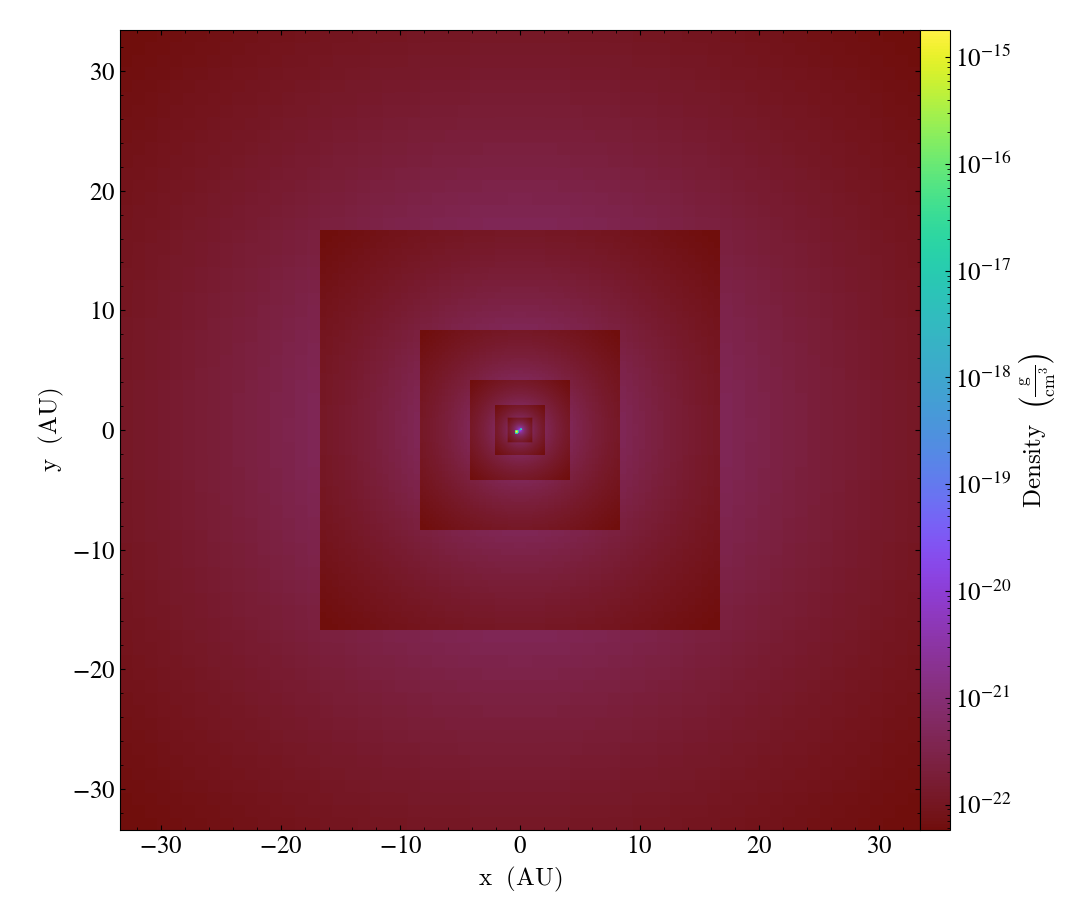

In [19]:
slc = yt.SlicePlot(ds, "z", "density")
slc.show()
